In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
new_data = pd.read_csv("leukemia.csv")
print(new_data.shape)

(74, 5148)


## 1. Mutual Info[F1] 
## 2. F Classif[F2] 
## 3.T-Test[F3]

## (c) 1. F1( N features ) → F2( 2N/3 features out of selected features from F1) →    
##           F3(N/3 features out of selected features from F2)

# Preprocessing

In [3]:
df = new_data.iloc[2:,:] # Removes first two tubles
print(df["gene"].unique())
df.gene[df.gene == 'ALL'] = 0
df.gene[df.gene == 'AML'] = 1
print('Updated value of gene : '+str(df["gene"].unique()))


['ALL' 'AML']
Updated value of gene : [0 1]


C:\Users\VISHAL SINGH\Anaconda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [4]:
print('Required data set ')
df.head()

Required data set 


,gene,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,0,88,15091,311,21,-13,215,797,14538,9738,...,384,1582,185,511,389,793,329,36,191,-37
3,0,283,11038,134,-21,-219,116,433,615,115,...,231,624,169,837,442,782,295,11,76,-14
4,0,309,16692,378,67,104,476,1474,5669,3272,...,720,753,315,1199,168,1138,777,41,228,-41
5,0,12,15763,268,43,-148,155,415,4850,2293,...,307,743,240,835,174,627,170,-50,126,-91
6,0,168,18128,118,-8,-55,122,483,1284,2731,...,178,626,156,649,504,250,314,14,56,-25


In [5]:
df.isnull().sum()

gene              0
AFFX-BioC-5_at    0
hum_alu_at        0
AFFX-DapX-M_at    0
AFFX-LysX-5_at    0
                 ..
X83863_at         0
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
Length: 5148, dtype: int64

In [6]:
feature_set = df.drop('gene', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['AFFX-BioC-5_at', 'hum_alu_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMRGE/M10098_5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMGAPDH/M33197_5_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HSAC07/X00351_5_at', 'AFFX-HSAC07/X00351_M_at', 'AFFX-HSAC07/X00351_3_at', 'AFFX-HUMTFRR/M11507_5_at', 'AFFX-HUMTFRR/M11507_M_at', 'AFFX-HUMTFRR/M11507_3_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-HSAC07/X00351_3_st', 'AFFX-HUMGAPDH/M33197_M_st', 'AFFX-HUMGAPDH/M33197_3_st', 'AFFX-HSAC07/X00351_M_st', 'A28102_at', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002365_at', 'AB002380_at', 'AB002559_at', 'AB003102_at', 'AB003103_

In [7]:
feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
2,88,15091,311,21,-13,215,797,14538,9738,8529,...,384,1582,185,511,389,793,329,36,191,-37
3,283,11038,134,-21,-219,116,433,615,115,1518,...,231,624,169,837,442,782,295,11,76,-14
4,309,16692,378,67,104,476,1474,5669,3272,3668,...,720,753,315,1199,168,1138,777,41,228,-41
5,12,15763,268,43,-148,155,415,4850,2293,2569,...,307,743,240,835,174,627,170,-50,126,-91
6,168,18128,118,-8,-55,122,483,1284,2731,316,...,178,626,156,649,504,250,314,14,56,-25


In [8]:
target_feature = df['gene']
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: gene, dtype: object

In [9]:
temp_feature_set=StandardScaler().fit_transform(feature_set)
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,...,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,...,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,...,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,...,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,...,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


# Training and Spilting of Data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((57, 5147), (15, 5147))

In [11]:
y_train.shape, y_test.shape

((57,), (15,))

In [12]:
columns = feature_set.shape[1]

number_of_features_required_1 = 2*(columns/3)
number_of_features_required_2 = columns/3
number_of_features_required_3 = 0.19*columns

print('number_of_features_required_1 : '+str(number_of_features_required_1))
print('number_of_features_required_2 : '+str(number_of_features_required_2))
print('number_of_features_required_3 : '+str(number_of_features_required_3))

number_of_features_required_1 = int(number_of_features_required_1)
number_of_features_required_2 = int(number_of_features_required_2)
number_of_features_required_3 = int(number_of_features_required_3)

print('number_of_features_required_1 in integers: '+str(number_of_features_required_1))
print('number_of_features_required_2 in integers: '+str(number_of_features_required_2))
print('number_of_features_required_3 in integers: '+str(number_of_features_required_3))

number_of_features_required_1 : 3431.3333333333335
number_of_features_required_2 : 1715.6666666666667
number_of_features_required_3 : 977.9300000000001
number_of_features_required_1 in integers: 3431
number_of_features_required_2 in integers: 1715
number_of_features_required_3 in integers: 977


# Selection of features using Mutual Information 

In [13]:
from scipy.special import digamma
def mutual_info(data,x_index,target):
  x=data[x_index]
  y=target
 
  combo_d= np.vstack((x,y)).T # It is Combining the data values

  n=len(x)
  n_x=[]
  unique_y=len(set(y))
  
  for i in range(unique_y):
    n_x.append([]) 
  for item in combo_d:
    index=item[1]
    n_x[index].append(item)
  I_i=np.zeros(len(x))
  indx=0
  for pt in combo_d:
    distx=[]
    
  # Calculating distance of a point with all other points in the same class
    for pt_c in n_x[pt[1]]:
      if pt_c[0]==pt[0]:
        continue
      distx.append(abs(pt_c[0]-pt[0]))
    distx.sort()
  
    k=3
    kth_dist_c=distx[k-1]
    dist=[]
    
   #Calculating distance of a point with all other points in the data set
    for pt_all in combo_d:
      if pt_all[0]==pt[0] and pt_all[1]==pt[1]:
        continue
      dist.append(abs(pt_all[0]-pt[0]))
    
    m_i=0
    for i in range(len(dist)):
      if dist[i]<=kth_dist_c:
        m_i+=1

    n_x_i=len(n_x[pt[1]])
    
    I_i[indx]=digamma(n)-digamma(n_x_i)+digamma(k)-digamma(m_i)
    indx=indx + 1
  mutual_info_xy=np.sum(I_i)/n
  return abs(mutual_info_xy)

In [14]:
X_train_tp=X_train.values.transpose()
mi_start_time = time.time()
 
total_features=len(feature_name)

mutual_information= np.zeros(total_features)
for i in range(total_features):
  mutual_information[i]=mutual_info(X_train_tp,i,y_train)
  print('Mutual Information between Gene and Feature_'+feature_name[i]+' : ',mutual_information[i])
    
print('Time taken by Mutual Information is :'+str(time.time() - mi_start_time)+' seconds')

Mutual Information between Gene and Feature_AFFX-BioC-5_at :  0.021441478646131672
Mutual Information between Gene and Feature_hum_alu_at :  0.06274365161483543
Mutual Information between Gene and Feature_AFFX-DapX-M_at :  0.12882872080119015
Mutual Information between Gene and Feature_AFFX-LysX-5_at :  0.08529769577880128
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MA_at :  0.019322971328844606
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_MB_at :  0.11272325477312349
Mutual Information between Gene and Feature_AFFX-HUMISGF3A/M97935_3_at :  0.013917988973383413
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_5_at :  0.014192886505913119
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_M_at :  0.01904898628704328
Mutual Information between Gene and Feature_AFFX-HUMRGE/M10098_3_at :  0.02141640444393509
Mutual Information between Gene and Feature_AFFX-HUMGAPDH/M33197_5_at :  0.04738958746577195
Mutual Information bet

Mutual Information between Gene and Feature_D13118_at :  0.01888821554334741
Mutual Information between Gene and Feature_D13168_at :  0.13505109257091902
Mutual Information between Gene and Feature_D13264_at :  0.006427001340231265
Mutual Information between Gene and Feature_D13315_at :  0.07388817221199902
Mutual Information between Gene and Feature_D13370_at :  0.015994202233807164
Mutual Information between Gene and Feature_D13435_at :  0.030907604536420615
Mutual Information between Gene and Feature_D13540_at :  0.0378810350311156
Mutual Information between Gene and Feature_D13626_at :  0.06685749772315595
Mutual Information between Gene and Feature_D13627_at :  0.10310407740708608
Mutual Information between Gene and Feature_D13628_at :  0.06965987998902382
Mutual Information between Gene and Feature_D13630_at :  0.022495491049337478
Mutual Information between Gene and Feature_D13633_at :  0.03678581501989426
Mutual Information between Gene and Feature_D13634_at :  0.08574229507543

Mutual Information between Gene and Feature_D28483_at :  0.007792378476213375
Mutual Information between Gene and Feature_D28588_at :  0.05156478613569614
Mutual Information between Gene and Feature_D28589_at :  0.03244916539929668
Mutual Information between Gene and Feature_D28915_at :  0.07129343521881319
Mutual Information between Gene and Feature_D29012_at :  0.09650418932274163
Mutual Information between Gene and Feature_D29013_at :  0.005299820221205997
Mutual Information between Gene and Feature_D29641_at :  0.04535421843592866
Mutual Information between Gene and Feature_D29642_at :  0.029968436491989412
Mutual Information between Gene and Feature_D29643_at :  0.0793596521008801
Mutual Information between Gene and Feature_D29677_at :  0.05129651358632039
Mutual Information between Gene and Feature_D29954_at :  0.06666048782474465
Mutual Information between Gene and Feature_D29956_at :  0.004940100444425778
Mutual Information between Gene and Feature_D29958_at :  0.06237412402082

Mutual Information between Gene and Feature_D50917_at :  0.018421850032986468
Mutual Information between Gene and Feature_D50918_at :  0.18184209702907037
Mutual Information between Gene and Feature_D50919_at :  0.0220694343722624
Mutual Information between Gene and Feature_D50920_at :  0.06783757948251277
Mutual Information between Gene and Feature_D50922_at :  0.060664590325247916
Mutual Information between Gene and Feature_D50924_at :  0.03558961842896084
Mutual Information between Gene and Feature_D50925_at :  0.0865364542442177
Mutual Information between Gene and Feature_D50926_at :  0.006110650399790987
Mutual Information between Gene and Feature_D50927_at :  0.05637404842391714
Mutual Information between Gene and Feature_D50928_at :  0.05066905653471475
Mutual Information between Gene and Feature_D50930_at :  0.036302248592055386
Mutual Information between Gene and Feature_D55654_at :  0.03481376167785745
Mutual Information between Gene and Feature_D55716_at :  0.027531416972912

Mutual Information between Gene and Feature_D83703_at :  0.08204146193431767
Mutual Information between Gene and Feature_D83735_at :  0.01907569681686424
Mutual Information between Gene and Feature_D83767_at :  0.11267172248474909
Mutual Information between Gene and Feature_D83776_at :  0.05489501572351082
Mutual Information between Gene and Feature_D83777_at :  0.030081754686068655
Mutual Information between Gene and Feature_D83778_at :  0.002780001089301225
Mutual Information between Gene and Feature_D83779_at :  0.03062696412420127
Mutual Information between Gene and Feature_D83780_at :  0.020420722996907538
Mutual Information between Gene and Feature_D83781_at :  0.02403193880504098
Mutual Information between Gene and Feature_D83782_at :  0.026469002917586186
Mutual Information between Gene and Feature_D83783_at :  0.005140735666102239
Mutual Information between Gene and Feature_D83784_at :  0.0049850693259597305
Mutual Information between Gene and Feature_D83785_at :  0.0463168685

Mutual Information between Gene and Feature_D87466_at :  0.046743611350089365
Mutual Information between Gene and Feature_D87467_at :  0.09134370552979719
Mutual Information between Gene and Feature_D87469_at :  0.048882003431872156
Mutual Information between Gene and Feature_D87470_at :  0.03017636515437463
Mutual Information between Gene and Feature_D87673_at :  0.0648709121297447
Mutual Information between Gene and Feature_D87683_at :  0.12333788200010207
Mutual Information between Gene and Feature_D87684_at :  0.011706774262168648
Mutual Information between Gene and Feature_D87685_at :  0.04735472051383007
Mutual Information between Gene and Feature_D87735_at :  0.0011952828838187038
Mutual Information between Gene and Feature_D87742_at :  0.0298883265434584
Mutual Information between Gene and Feature_D87743_at :  0.01397242182044288
Mutual Information between Gene and Feature_D87845_at :  0.003412847064602846
Mutual Information between Gene and Feature_D87937_at :  0.0627469883494

Mutual Information between Gene and Feature_HG3971-HT4241_at :  0.014195757014309397
Mutual Information between Gene and Feature_HG3976-HT4246_at :  0.13975940088821692
Mutual Information between Gene and Feature_HG3987-HT4257_at :  0.10766743411601737
Mutual Information between Gene and Feature_HG3995-HT4265_at :  0.01847806574926101
Mutual Information between Gene and Feature_HG4018-HT4288_at :  0.009325041909905064
Mutual Information between Gene and Feature_HG4036-HT4306_at :  0.05008125094933889
Mutual Information between Gene and Feature_HG4058-HT4328_at :  0.10894512534728343
Mutual Information between Gene and Feature_HG406-HT406_at :  0.0503172747791526
Mutual Information between Gene and Feature_HG4073-HT4343_at :  0.005932586720845541
Mutual Information between Gene and Feature_HG4074-HT4344_at :  0.09249694034021796
Mutual Information between Gene and Feature_HG4102-HT4372_at :  0.09690269618940701
Mutual Information between Gene and Feature_HG4114-HT4384_at :  0.0068113670

Mutual Information between Gene and Feature_J04469_at :  0.05590620189107642
Mutual Information between Gene and Feature_J04501_at :  0.003089469262266332
Mutual Information between Gene and Feature_J04543_at :  0.01766358553633189
Mutual Information between Gene and Feature_J04605_at :  0.025652719120487534
Mutual Information between Gene and Feature_J04611_at :  0.026804828746323898
Mutual Information between Gene and Feature_J04615_at :  0.1656169093767713
Mutual Information between Gene and Feature_J04621_at :  0.03166753245822097
Mutual Information between Gene and Feature_J04739_at :  0.02709489510960099
Mutual Information between Gene and Feature_J04742_at :  0.039759595625253795
Mutual Information between Gene and Feature_J04794_at :  0.0762419918342935
Mutual Information between Gene and Feature_J04809_rna1_at :  0.00888068637947154
Mutual Information between Gene and Feature_J04823_rna1_at :  0.045172436694212593
Mutual Information between Gene and Feature_J04970_at :  0.0741

Mutual Information between Gene and Feature_L13977_at :  0.10996245877946309
Mutual Information between Gene and Feature_L14076_at :  0.0486411749117541
Mutual Information between Gene and Feature_L14542_at :  0.13657018060391765
Mutual Information between Gene and Feature_L14754_at :  0.046287566956875165
Mutual Information between Gene and Feature_L14787_at :  0.011997250757645806
Mutual Information between Gene and Feature_L14812_at :  0.03552455907597582
Mutual Information between Gene and Feature_L14837_at :  0.0794376219905867
Mutual Information between Gene and Feature_L14856_at :  0.03685277227344927
Mutual Information between Gene and Feature_L14922_at :  0.03546143091156219
Mutual Information between Gene and Feature_L15309_at :  0.11613074626111033
Mutual Information between Gene and Feature_L15388_at :  0.0070216707278717315
Mutual Information between Gene and Feature_L15409_at :  0.04842475084613662
Mutual Information between Gene and Feature_L15702_at :  0.022227454761807

Mutual Information between Gene and Feature_L34587_at :  0.024697584621400072
Mutual Information between Gene and Feature_L34600_at :  0.02039192931947129
Mutual Information between Gene and Feature_L34657_at :  0.18752148280663117
Mutual Information between Gene and Feature_L34820_at :  0.06421456632104434
Mutual Information between Gene and Feature_L35035_at :  0.01762929465633649
Mutual Information between Gene and Feature_L35240_at :  0.005887380309605289
Mutual Information between Gene and Feature_L35251_rna1_at :  0.052909483783820675
Mutual Information between Gene and Feature_L35475_at :  0.016894116446414927
Mutual Information between Gene and Feature_L35545_at :  0.10770605354698642
Mutual Information between Gene and Feature_L35546_at :  0.06630580769778169
Mutual Information between Gene and Feature_L36033_at :  0.011898792194139168
Mutual Information between Gene and Feature_L36051_at :  0.037222938899112074
Mutual Information between Gene and Feature_L36151_at :  0.004283

Mutual Information between Gene and Feature_M10014_cds1_at :  0.017280346070195362
Mutual Information between Gene and Feature_M10612_at :  0.0422053467010214
Mutual Information between Gene and Feature_M10901_at :  0.052031069849622136
Mutual Information between Gene and Feature_M11058_at :  0.029109619954488044
Mutual Information between Gene and Feature_M11119_at :  0.09009208652804147
Mutual Information between Gene and Feature_M11147_at :  0.24082958150336786
Mutual Information between Gene and Feature_M11353_at :  0.08153249488756156
Mutual Information between Gene and Feature_M11717_rna1_at :  0.07626018081004954
Mutual Information between Gene and Feature_M11718_at :  0.04658689391010466
Mutual Information between Gene and Feature_M11722_at :  0.3234384879675665
Mutual Information between Gene and Feature_M11726_at :  0.06381273684381567
Mutual Information between Gene and Feature_M12174_at :  0.0008821213322526161
Mutual Information between Gene and Feature_M12529_at :  0.0348

Mutual Information between Gene and Feature_M24902_at :  0.09561869286450425
Mutual Information between Gene and Feature_M25077_at :  0.10601507503862799
Mutual Information between Gene and Feature_M25164_at :  0.08029703805898107
Mutual Information between Gene and Feature_M25269_at :  0.044528105264614266
Mutual Information between Gene and Feature_M25280_at :  0.028767517527912546
Mutual Information between Gene and Feature_M25322_at :  0.07514827920523608
Mutual Information between Gene and Feature_M25393_at :  0.09059027079803424
Mutual Information between Gene and Feature_M25629_at :  0.13495066186895166
Mutual Information between Gene and Feature_M25753_at :  0.02762486459976368
Mutual Information between Gene and Feature_M25756_at :  0.048106313512463805
Mutual Information between Gene and Feature_M25897_at :  0.001755220252223245
Mutual Information between Gene and Feature_M26061_at :  0.07072911343687692
Mutual Information between Gene and Feature_M26062_at :  0.0903000152446

Mutual Information between Gene and Feature_M35878_at :  0.07051996399641104
Mutual Information between Gene and Feature_M36067_at :  0.011903776979961493
Mutual Information between Gene and Feature_M36089_at :  0.07527014487419313
Mutual Information between Gene and Feature_M36200_at :  0.06114245253442654
Mutual Information between Gene and Feature_M36205_at :  0.020619836190969368
Mutual Information between Gene and Feature_M36341_at :  0.06386156577985554
Mutual Information between Gene and Feature_M37033_at :  0.004027505790996769
Mutual Information between Gene and Feature_M37104_at :  0.022047018812939564
Mutual Information between Gene and Feature_M37190_at :  0.008198450406651611
Mutual Information between Gene and Feature_M37197_at :  0.07794282865611782
Mutual Information between Gene and Feature_M37245_at :  0.00439176110514356
Mutual Information between Gene and Feature_M37400_at :  0.00656738077669224
Mutual Information between Gene and Feature_M37435_at :  0.016399710374

Mutual Information between Gene and Feature_M65085_at :  0.015634312869940107
Mutual Information between Gene and Feature_M65131_rna1_at :  0.07754917389470826
Mutual Information between Gene and Feature_M65217_at :  0.00935323117334593
Mutual Information between Gene and Feature_M65254_at :  0.10141969292245576
Mutual Information between Gene and Feature_M65290_at :  0.18458694176838944
Mutual Information between Gene and Feature_M65291_at :  0.09075330970964741
Mutual Information between Gene and Feature_M68520_at :  0.06468210537435326
Mutual Information between Gene and Feature_M68864_at :  0.1677551006538851
Mutual Information between Gene and Feature_M68874_at :  0.02248861554467622
Mutual Information between Gene and Feature_M68891_at :  0.11703909409289803
Mutual Information between Gene and Feature_M68941_at :  0.047845386628987
Mutual Information between Gene and Feature_M69023_at :  0.04394019927111424
Mutual Information between Gene and Feature_M69039_at :  0.00599979534068

Mutual Information between Gene and Feature_M87860_at :  0.11760819163377283
Mutual Information between Gene and Feature_M88108_at :  0.07234305372660024
Mutual Information between Gene and Feature_M88163_at :  0.030243986535341313
Mutual Information between Gene and Feature_M88279_at :  0.06482100895535077
Mutual Information between Gene and Feature_M88282_at :  0.06489191944178817
Mutual Information between Gene and Feature_M88458_at :  0.0016751356884900457
Mutual Information between Gene and Feature_M88468_at :  0.04235268245207231
Mutual Information between Gene and Feature_M88579_at :  0.09324835832454281
Mutual Information between Gene and Feature_M89473_at :  0.07133948231349962
Mutual Information between Gene and Feature_M89957_at :  0.2456759240207921
Mutual Information between Gene and Feature_M90299_at :  0.0010765645090305858
Mutual Information between Gene and Feature_M90366_at :  0.003773968138063876
Mutual Information between Gene and Feature_M90516_at :  0.028121548625

Mutual Information between Gene and Feature_S77393_at :  0.0689580287710554
Mutual Information between Gene and Feature_S77415_at :  0.09329835705875208
Mutual Information between Gene and Feature_S77576_at :  0.02308587838149103
Mutual Information between Gene and Feature_S77583_at :  0.00955510220867165
Mutual Information between Gene and Feature_S77763_at :  0.05585895897775707
Mutual Information between Gene and Feature_S77812_at :  0.04434449258100159
Mutual Information between Gene and Feature_S78085_at :  0.02778694527553185
Mutual Information between Gene and Feature_S78187_at :  0.03054363920585922
Mutual Information between Gene and Feature_S78203_at :  0.02407554408695751
Mutual Information between Gene and Feature_S78296_at :  0.003622551123766008
Mutual Information between Gene and Feature_S78569_at :  0.18140808761389574
Mutual Information between Gene and Feature_S78653_at :  0.09968026895461712
Mutual Information between Gene and Feature_S79048_at :  0.1136937998226159


Mutual Information between Gene and Feature_U08316_at :  0.08538039061135945
Mutual Information between Gene and Feature_U08377_at :  0.09352063220362788
Mutual Information between Gene and Feature_U08471_at :  0.004497114155342049
Mutual Information between Gene and Feature_U08815_at :  0.1189114379349909
Mutual Information between Gene and Feature_U08989_at :  0.06289050668186147
Mutual Information between Gene and Feature_U08998_at :  0.07772888032827018
Mutual Information between Gene and Feature_U09117_at :  0.037176805465064286
Mutual Information between Gene and Feature_U09196_at :  0.03589983266575341
Mutual Information between Gene and Feature_U09284_at :  0.01415503449437691
Mutual Information between Gene and Feature_U09303_at :  0.04352652299899238
Mutual Information between Gene and Feature_U09366_at :  0.05694757333954731
Mutual Information between Gene and Feature_U09367_at :  0.0882884023787632
Mutual Information between Gene and Feature_U09410_at :  0.02437466914370031

Mutual Information between Gene and Feature_U17280_at :  0.0121125855222247
Mutual Information between Gene and Feature_U17327_at :  0.0096699852826697
Mutual Information between Gene and Feature_U17714_at :  0.018363162967211265
Mutual Information between Gene and Feature_U17886_at :  0.060241355580697965
Mutual Information between Gene and Feature_U17894_at :  0.03782983993631794
Mutual Information between Gene and Feature_U17977_at :  0.0061893646866018216
Mutual Information between Gene and Feature_U17989_at :  0.11871698117177089
Mutual Information between Gene and Feature_U18009_at :  0.008068535567320683
Mutual Information between Gene and Feature_U18062_at :  0.16558625559983306
Mutual Information between Gene and Feature_U18242_at :  0.07252557101438073
Mutual Information between Gene and Feature_U18271_cds1_at :  0.03247562175213402
Mutual Information between Gene and Feature_U18291_at :  0.022601873369356536
Mutual Information between Gene and Feature_U18300_at :  0.07181914

Mutual Information between Gene and Feature_U30888_at :  0.08179048636356043
Mutual Information between Gene and Feature_U30894_at :  0.027588219725671964
Mutual Information between Gene and Feature_U30930_at :  0.12210280281366226
Mutual Information between Gene and Feature_U30998_at :  0.049178422894822486
Mutual Information between Gene and Feature_U30999_at :  0.05208230940651123
Mutual Information between Gene and Feature_U31099_at :  0.039794744745328285
Mutual Information between Gene and Feature_U31176_at :  0.013270276460360244
Mutual Information between Gene and Feature_U31248_at :  0.07577777564498182
Mutual Information between Gene and Feature_U31342_at :  0.0630250219064381
Mutual Information between Gene and Feature_U31382_at :  0.14291381614421136
Mutual Information between Gene and Feature_U31383_at :  0.08962884502479668
Mutual Information between Gene and Feature_U31384_at :  0.03951597959216414
Mutual Information between Gene and Feature_U31501_at :  0.05909062827916

Mutual Information between Gene and Feature_U43292_at :  0.11242941906376085
Mutual Information between Gene and Feature_U43328_at :  0.07826794219332014
Mutual Information between Gene and Feature_U43374_at :  0.09397258536455938
Mutual Information between Gene and Feature_U43408_at :  0.06267211195882279
Mutual Information between Gene and Feature_U43519_at :  0.06162918615610075
Mutual Information between Gene and Feature_U43522_at :  0.007435606833106551
Mutual Information between Gene and Feature_U43527_at :  0.02443948221160938
Mutual Information between Gene and Feature_U43672_at :  0.06900453102302402
Mutual Information between Gene and Feature_U43753_cds2_at :  0.09386093517550975
Mutual Information between Gene and Feature_U43885_at :  0.06300804176000935
Mutual Information between Gene and Feature_U43899_at :  0.10608620274133462
Mutual Information between Gene and Feature_U43923_at :  0.035840917552658745
Mutual Information between Gene and Feature_U43965_at :  0.0368797494

Mutual Information between Gene and Feature_U52522_at :  0.0005295294301820745
Mutual Information between Gene and Feature_U52682_at :  0.034386606041737953
Mutual Information between Gene and Feature_U52827_at :  0.0466249227223717
Mutual Information between Gene and Feature_U52830_at :  0.024170456590336866
Mutual Information between Gene and Feature_U53003_at :  0.009550305000436295
Mutual Information between Gene and Feature_U53174_at :  0.04104644230683734
Mutual Information between Gene and Feature_U53209_at :  0.10940630879362433
Mutual Information between Gene and Feature_U53225_at :  0.1021080586548169
Mutual Information between Gene and Feature_U53347_at :  0.053176913330089864
Mutual Information between Gene and Feature_U53446_at :  0.07891975139776088
Mutual Information between Gene and Feature_U53468_at :  0.031221115236240722
Mutual Information between Gene and Feature_U53786_at :  0.03110141832684698
Mutual Information between Gene and Feature_U53830_at :  0.004054413867

Mutual Information between Gene and Feature_U65928_at :  0.13398670147154332
Mutual Information between Gene and Feature_U65932_at :  0.018900457771641656
Mutual Information between Gene and Feature_U66033_at :  0.11343592284362115
Mutual Information between Gene and Feature_U66036_at :  0.05899415220501163
Mutual Information between Gene and Feature_U66048_at :  0.01100948218188638
Mutual Information between Gene and Feature_U66052_at :  0.03558424499628585
Mutual Information between Gene and Feature_U66059_cds7_at :  0.05741813104694713
Mutual Information between Gene and Feature_U66075_at :  0.1798202172648228
Mutual Information between Gene and Feature_U66083_at :  0.00920132191151512
Mutual Information between Gene and Feature_U66088_at :  0.04897517508077139
Mutual Information between Gene and Feature_U66406_at :  0.0498455279248084
Mutual Information between Gene and Feature_U66464_at :  0.0012194523960633215
Mutual Information between Gene and Feature_U66469_at :  0.14872080984

Mutual Information between Gene and Feature_U78095_at :  0.1460660274478028
Mutual Information between Gene and Feature_U78107_at :  0.09834633052777822
Mutual Information between Gene and Feature_U78190_rna1_at :  0.016032330049634048
Mutual Information between Gene and Feature_U78521_at :  0.093087002507722
Mutual Information between Gene and Feature_U78524_at :  0.03181872142519945
Mutual Information between Gene and Feature_U78525_at :  0.040118406775968375
Mutual Information between Gene and Feature_U78556_at :  0.08719699505954283
Mutual Information between Gene and Feature_U78575_at :  0.07315237243908325
Mutual Information between Gene and Feature_U78628_at :  0.04945645148553014
Mutual Information between Gene and Feature_U78678_at :  0.05054862928607019
Mutual Information between Gene and Feature_U78722_at :  0.02989558049808082
Mutual Information between Gene and Feature_U78735_at :  0.06488391492451695
Mutual Information between Gene and Feature_U78793_at :  0.0228811334608

Mutual Information between Gene and Feature_U89896_at :  0.0372298398060243
Mutual Information between Gene and Feature_U90304_at :  0.061476355280731254
Mutual Information between Gene and Feature_U90313_at :  0.011572630190854779
Mutual Information between Gene and Feature_U90426_at :  0.02651360672137018
Mutual Information between Gene and Feature_U90437_at :  0.08559835725348916
Mutual Information between Gene and Feature_U90547_at :  0.031033217084633847
Mutual Information between Gene and Feature_U90549_at :  0.2320231051048153
Mutual Information between Gene and Feature_U90550_at :  0.06340659954559975
Mutual Information between Gene and Feature_U90551_at :  0.02871199488479197
Mutual Information between Gene and Feature_U90651_at :  0.0003463023753810071
Mutual Information between Gene and Feature_U90716_at :  0.013696159200484505
Mutual Information between Gene and Feature_U90878_at :  0.019228102836128854
Mutual Information between Gene and Feature_U90902_at :  0.129774122761

Mutual Information between Gene and Feature_X06948_at :  0.04555420435371559
Mutual Information between Gene and Feature_X06985_at :  0.04502969691851794
Mutual Information between Gene and Feature_X07024_at :  0.03242535758287663
Mutual Information between Gene and Feature_X07109_at :  0.05077240600337483
Mutual Information between Gene and Feature_X07173_at :  0.1962940527402063
Mutual Information between Gene and Feature_X07290_at :  0.10165337636578378
Mutual Information between Gene and Feature_X07315_at :  0.05995377766154109
Mutual Information between Gene and Feature_X07743_at :  0.24548809274111094
Mutual Information between Gene and Feature_X07767_at :  0.009239287419172636
Mutual Information between Gene and Feature_X07820_at :  0.09515590496893159
Mutual Information between Gene and Feature_X07834_at :  0.05307132900379507
Mutual Information between Gene and Feature_X07979_at :  0.02154973525593627
Mutual Information between Gene and Feature_X12433_at :  0.03758031238314040

Mutual Information between Gene and Feature_X55733_at :  0.007285060784727649
Mutual Information between Gene and Feature_X55740_at :  0.01570665051967717
Mutual Information between Gene and Feature_X55885_at :  0.020665783375976556
Mutual Information between Gene and Feature_X55954_at :  0.013998921683730996
Mutual Information between Gene and Feature_X56199_at :  0.035216526608500644
Mutual Information between Gene and Feature_X56253_rna1_at :  0.10514481950891523
Mutual Information between Gene and Feature_X56411_rna1_at :  0.04405946598833276
Mutual Information between Gene and Feature_X56465_at :  0.11039705500110326
Mutual Information between Gene and Feature_X56468_at :  0.12793674312371645
Mutual Information between Gene and Feature_X56494_at :  0.0010823633077919619
Mutual Information between Gene and Feature_X56667_at :  0.02393721138181696
Mutual Information between Gene and Feature_X56692_at :  0.07588002796330062
Mutual Information between Gene and Feature_X56741_at :  0.0

Mutual Information between Gene and Feature_X66945_at :  0.037886873545983114
Mutual Information between Gene and Feature_X67098_at :  0.0753581052463527
Mutual Information between Gene and Feature_X67155_at :  0.02987194242733685
Mutual Information between Gene and Feature_X67247_rna1_at :  0.026238729967757907
Mutual Information between Gene and Feature_X67325_at :  0.037876816704412515
Mutual Information between Gene and Feature_X67337_at :  0.07909197191052424
Mutual Information between Gene and Feature_X67697_at :  0.07923669489337476
Mutual Information between Gene and Feature_X67698_at :  0.1395563864894686
Mutual Information between Gene and Feature_X67951_at :  0.1933752346710619
Mutual Information between Gene and Feature_X68149_at :  0.1242779524578376
Mutual Information between Gene and Feature_X68194_at :  0.05862791049200623
Mutual Information between Gene and Feature_X68242_at :  0.10560180481138193
Mutual Information between Gene and Feature_X68277_at :  0.0098276124037

Mutual Information between Gene and Feature_X78549_at :  0.022145415354769334
Mutual Information between Gene and Feature_X78565_at :  0.02850594416262404
Mutual Information between Gene and Feature_X78627_at :  0.014813852369246802
Mutual Information between Gene and Feature_X78669_at :  0.2034587459028184
Mutual Information between Gene and Feature_X78687_at :  4.807978613676299e-05
Mutual Information between Gene and Feature_X78710_at :  0.062183149738544156
Mutual Information between Gene and Feature_X78817_at :  0.17721093384527564
Mutual Information between Gene and Feature_X78924_at :  0.028126269943940536
Mutual Information between Gene and Feature_X78925_at :  0.034783059092975264
Mutual Information between Gene and Feature_X78926_at :  0.049591917299680766
Mutual Information between Gene and Feature_X78933_at :  0.05690073908218674
Mutual Information between Gene and Feature_X78992_at :  0.16499829449396913
Mutual Information between Gene and Feature_X79067_at :  0.1194324532

Mutual Information between Gene and Feature_X90978_at :  0.03318358824957417
Mutual Information between Gene and Feature_X90999_at :  0.006515133544212193
Mutual Information between Gene and Feature_X91103_at :  0.11711693216569063
Mutual Information between Gene and Feature_X91247_at :  0.022085213477187497
Mutual Information between Gene and Feature_X91249_at :  0.023248570672386164
Mutual Information between Gene and Feature_X91257_at :  0.1328001994224127
Mutual Information between Gene and Feature_X91504_at :  0.012099146912173514
Mutual Information between Gene and Feature_X91648_at :  0.04126189805918594
Mutual Information between Gene and Feature_X91788_at :  0.07832134877148003
Mutual Information between Gene and Feature_X91809_at :  0.06459275466893914
Mutual Information between Gene and Feature_X91868_at :  0.026179170148529086
Mutual Information between Gene and Feature_X92098_at :  0.015029396576154892
Mutual Information between Gene and Feature_X92106_at :  0.032865054301

Mutual Information between Gene and Feature_Z29090_at :  0.015967476438397795
Mutual Information between Gene and Feature_Z29331_at :  0.004805237832768476
Mutual Information between Gene and Feature_Z29481_at :  0.032045929862052465
Mutual Information between Gene and Feature_Z29505_at :  0.0885947670170345
Mutual Information between Gene and Feature_Z29572_at :  0.041146928372357026
Mutual Information between Gene and Feature_Z29574_at :  0.040360456698236666
Mutual Information between Gene and Feature_Z29678_at :  0.10328795530750773
Mutual Information between Gene and Feature_Z30425_at :  0.10914671249158063
Mutual Information between Gene and Feature_Z30426_at :  0.0009973344945716437
Mutual Information between Gene and Feature_Z31357_at :  0.04363560470004264
Mutual Information between Gene and Feature_Z32684_at :  0.12073417659983478
Mutual Information between Gene and Feature_Z32765_at :  0.0629614058944455
Mutual Information between Gene and Feature_Z34897_at :  0.003713655554

Mutual Information between Gene and Feature_K01900_at :  0.05794247447490244
Mutual Information between Gene and Feature_K02766_at :  0.09603571506945213
Mutual Information between Gene and Feature_L00058_at :  0.04612481723284324
Mutual Information between Gene and Feature_L00205_at :  0.04833289186353293
Mutual Information between Gene and Feature_L04282_at :  0.028955049240197633
Mutual Information between Gene and Feature_L04731_at :  0.0014819040162571484
Mutual Information between Gene and Feature_L04751_at :  0.09151441974849903
Mutual Information between Gene and Feature_L06133_at :  0.056366446465836335
Mutual Information between Gene and Feature_L07615_at :  0.05718829085051088
Mutual Information between Gene and Feature_L07648_at :  0.0003215743891083254
Mutual Information between Gene and Feature_L07919_at :  0.01924518181293891
Mutual Information between Gene and Feature_L08895_at :  0.1829381832795539
Mutual Information between Gene and Feature_L10413_at :  0.086021807535

Mutual Information between Gene and Feature_X59739_at :  0.06162595839187913
Mutual Information between Gene and Feature_X63468_at :  0.012108250868645925
Mutual Information between Gene and Feature_X63717_at :  0.10955377060518728
Mutual Information between Gene and Feature_X64994_at :  0.051357676389865464
Mutual Information between Gene and Feature_X65463_at :  0.02612365908615301
Mutual Information between Gene and Feature_X65488_at :  0.08880341243222852
Mutual Information between Gene and Feature_X65857_at :  0.0016847894695449334
Mutual Information between Gene and Feature_X66087_at :  0.005910053068280924
Mutual Information between Gene and Feature_X66785_at :  0.004053552870557209
Mutual Information between Gene and Feature_X70811_at :  0.14822404282809107
Mutual Information between Gene and Feature_X71661_at :  0.02837682634774771
Mutual Information between Gene and Feature_X72727_at :  0.12153943672641011
Mutual Information between Gene and Feature_X72889_at :  0.03958245608

Mutual Information between Gene and Feature_U23736_s_at :  0.05717533880100192
Mutual Information between Gene and Feature_M19311_at :  0.0613307613861558
Mutual Information between Gene and Feature_M19311_s_at :  0.015297017545273095
Mutual Information between Gene and Feature_D45917_s_at :  0.017178843526822116
Mutual Information between Gene and Feature_D49354_s_at :  0.0578096065260061
Mutual Information between Gene and Feature_D49372_s_at :  0.02884350136148149
Mutual Information between Gene and Feature_D49487_s_at :  0.054000090646795056
Mutual Information between Gene and Feature_D49824_s_at :  0.10702736684039346
Mutual Information between Gene and Feature_L38593_s_at :  0.05423226695632828
Mutual Information between Gene and Feature_U50079_s_at :  0.03876553783307177
Mutual Information between Gene and Feature_Z75190_s_at :  0.04285090003234769
Mutual Information between Gene and Feature_D50855_s_at :  0.005974995809063723
Mutual Information between Gene and Feature_U58046_s

Mutual Information between Gene and Feature_HG3342-HT3519_s_at :  0.07049926962303438
Mutual Information between Gene and Feature_HG3395-HT3573_s_at :  0.02528079770461317
Mutual Information between Gene and Feature_X68505_s_at :  0.024363123835986076
Mutual Information between Gene and Feature_HG3417-HT3600_s_at :  0.08761702391082288
Mutual Information between Gene and Feature_HG3426-HT3610_s_at :  0.05164371540411045
Mutual Information between Gene and Feature_HG3432-HT3620_s_at :  0.15330080406828722
Mutual Information between Gene and Feature_HG3437-HT3628_s_at :  0.04038392972482012
Mutual Information between Gene and Feature_HG3484-HT3678_s_at :  0.009757507070533678
Mutual Information between Gene and Feature_HG3523-HT4899_s_at :  0.004377602459312682
Mutual Information between Gene and Feature_M13929_s_at :  0.008925809528309882
Mutual Information between Gene and Feature_J03242_s_at :  0.02693763430700456
Mutual Information between Gene and Feature_M17863_s_at :  0.0038321358

Mutual Information between Gene and Feature_M26958_s_at :  0.060133639848491446
Mutual Information between Gene and Feature_J03805_s_at :  0.09239590410521552
Mutual Information between Gene and Feature_M96233_s_at :  0.06238977475698096
Mutual Information between Gene and Feature_J05253_s_at :  0.08778983403963762
Mutual Information between Gene and Feature_J03934_s_at :  0.00015643738186604708
Mutual Information between Gene and Feature_J04029_s_at :  0.1403134491463643
Mutual Information between Gene and Feature_J04046_s_at :  0.01666783916905405
Mutual Information between Gene and Feature_M69203_s_at :  0.015246087404315288
Mutual Information between Gene and Feature_J04130_s_at :  0.026980092079481953
Mutual Information between Gene and Feature_J04152_rna1_s_at :  0.05343593258047298
Mutual Information between Gene and Feature_M61827_rna1_s_at :  0.06621126281220067
Mutual Information between Gene and Feature_X14684_s_at :  0.16886608668463898
Mutual Information between Gene and F

Mutual Information between Gene and Feature_X05855_s_at :  0.05457949608225893
Mutual Information between Gene and Feature_X07438_s_at :  0.1391943767477343
Mutual Information between Gene and Feature_X03363_s_at :  0.005412824547166326
Mutual Information between Gene and Feature_X02875_s_at :  0.03139264754427608
Mutual Information between Gene and Feature_M12959_s_at :  0.2921184191474977
Mutual Information between Gene and Feature_M13560_s_at :  0.010368616234274432
Mutual Information between Gene and Feature_M13690_s_at :  0.169322650659912
Mutual Information between Gene and Feature_M13829_s_at :  0.0732222243278206
Mutual Information between Gene and Feature_M34353_s_at :  0.05698325890154866
Mutual Information between Gene and Feature_M60891_s_at :  0.06423005693782041
Mutual Information between Gene and Feature_U59058_s_at :  0.02213996608611964
Mutual Information between Gene and Feature_M14328_s_at :  0.13430875375269302
Mutual Information between Gene and Feature_M16336_s_at

Mutual Information between Gene and Feature_S81661_s_at :  0.13673674844605987
Mutual Information between Gene and Feature_M61826_s_at :  0.06177813006638892
Mutual Information between Gene and Feature_M61832_s_at :  0.04327114971730326
Mutual Information between Gene and Feature_X65962_s_at :  0.04628818447826828
Mutual Information between Gene and Feature_M62403_s_at :  0.12017308149008585
Mutual Information between Gene and Feature_S38742_s_at :  0.012075096833929452
Mutual Information between Gene and Feature_M62628_s_at :  0.11767230182743368
Mutual Information between Gene and Feature_X53595_s_at :  0.0984370779869467
Mutual Information between Gene and Feature_M63438_s_at :  0.0061286169524437635
Mutual Information between Gene and Feature_M92843_s_at :  0.012559258402228154
Mutual Information between Gene and Feature_M63838_s_at :  0.19536990125153872
Mutual Information between Gene and Feature_M64269_s_at :  0.03622224957731626
Mutual Information between Gene and Feature_X5182

Mutual Information between Gene and Feature_U28488_s_at :  0.1209467549197978
Mutual Information between Gene and Feature_U75276_s_at :  0.05346020222453249
Mutual Information between Gene and Feature_Z50115_s_at :  0.02040709856377845
Mutual Information between Gene and Feature_U30827_s_at :  0.03651283235527078
Mutual Information between Gene and Feature_U45328_s_at :  0.008032915818064154
Mutual Information between Gene and Feature_U31903_s_at :  0.0674886404595618
Mutual Information between Gene and Feature_U41068_cds2_s_at :  0.006383329934746651
Mutual Information between Gene and Feature_U40271_s_at :  0.029971235836894053
Mutual Information between Gene and Feature_U43203_s_at :  0.07482947033379565
Mutual Information between Gene and Feature_X82850_s_at :  0.055939887551024
Mutual Information between Gene and Feature_U67092_at :  0.014324723479855368
Mutual Information between Gene and Feature_U67092_s_at :  0.05617936036315275
Mutual Information between Gene and Feature_X9119

Mutual Information between Gene and Feature_X64877_at :  0.0969828755469206
Mutual Information between Gene and Feature_X98337_s_at :  0.1215966479446265
Mutual Information between Gene and Feature_X69116_s_at :  0.14306529902872486
Mutual Information between Gene and Feature_Z25521_s_at :  0.0024159261323257156
Mutual Information between Gene and Feature_X85781_s_at :  0.1424207259179631
Mutual Information between Gene and Feature_X74987_s_at :  0.10725482685887516
Mutual Information between Gene and Feature_X76223_s_at :  0.0030054852977218585
Mutual Information between Gene and Feature_X79200_at :  0.04265261620403294
Mutual Information between Gene and Feature_X97267_rna1_s_at :  0.22708866332826821
Mutual Information between Gene and Feature_X82206_s_at :  0.030066046623003502
Mutual Information between Gene and Feature_X87871_s_at :  0.08066347857179287
Mutual Information between Gene and Feature_Z49825_s_at :  0.07950519674325372
Mutual Information between Gene and Feature_Z6904

Mutual Information between Gene and Feature_M99439_at :  0.015200989652683402
Mutual Information between Gene and Feature_U01317_cds4_at :  0.003813864942681028
Mutual Information between Gene and Feature_U03858_at :  0.062339864423137076
Mutual Information between Gene and Feature_U05861_at :  0.10018961930075576
Mutual Information between Gene and Feature_U12140_at :  0.036338646481638856
Mutual Information between Gene and Feature_U19765_at :  0.04390761435774563
Mutual Information between Gene and Feature_U24685_at :  0.0282885112386425
Mutual Information between Gene and Feature_U25975_at :  0.010774147091151418
Mutual Information between Gene and Feature_U27460_at :  0.18636729892269327
Mutual Information between Gene and Feature_U28014_at :  0.01133232830479764
Mutual Information between Gene and Feature_U40279_at :  0.04043341006066369
Mutual Information between Gene and Feature_U43944_at :  0.006684627792653788
Mutual Information between Gene and Feature_U44103_at :  0.0763617

Mutual Information between Gene and Feature_U10690_f_at :  0.003064565509171082
Mutual Information between Gene and Feature_U22029_f_at :  0.1140509962324439
Mutual Information between Gene and Feature_U49974_f_at :  0.031807126411174724
Mutual Information between Gene and Feature_U65918_f_at :  0.15045280105530137
Mutual Information between Gene and Feature_V00532_rna1_f_at :  0.045660135001025406
Mutual Information between Gene and Feature_V00533_rna1_f_at :  0.09209794927939695
Mutual Information between Gene and Feature_V01516_f_at :  0.08379647798501381
Mutual Information between Gene and Feature_X13930_f_at :  0.005636374252827718
Mutual Information between Gene and Feature_X53065_f_at :  0.08892559093146424
Mutual Information between Gene and Feature_X64177_f_at :  0.021799791984335584
Mutual Information between Gene and Feature_X67491_f_at :  0.008593050807902418
Mutual Information between Gene and Feature_X71345_f_at :  0.003192768414922812
Mutual Information between Gene and 

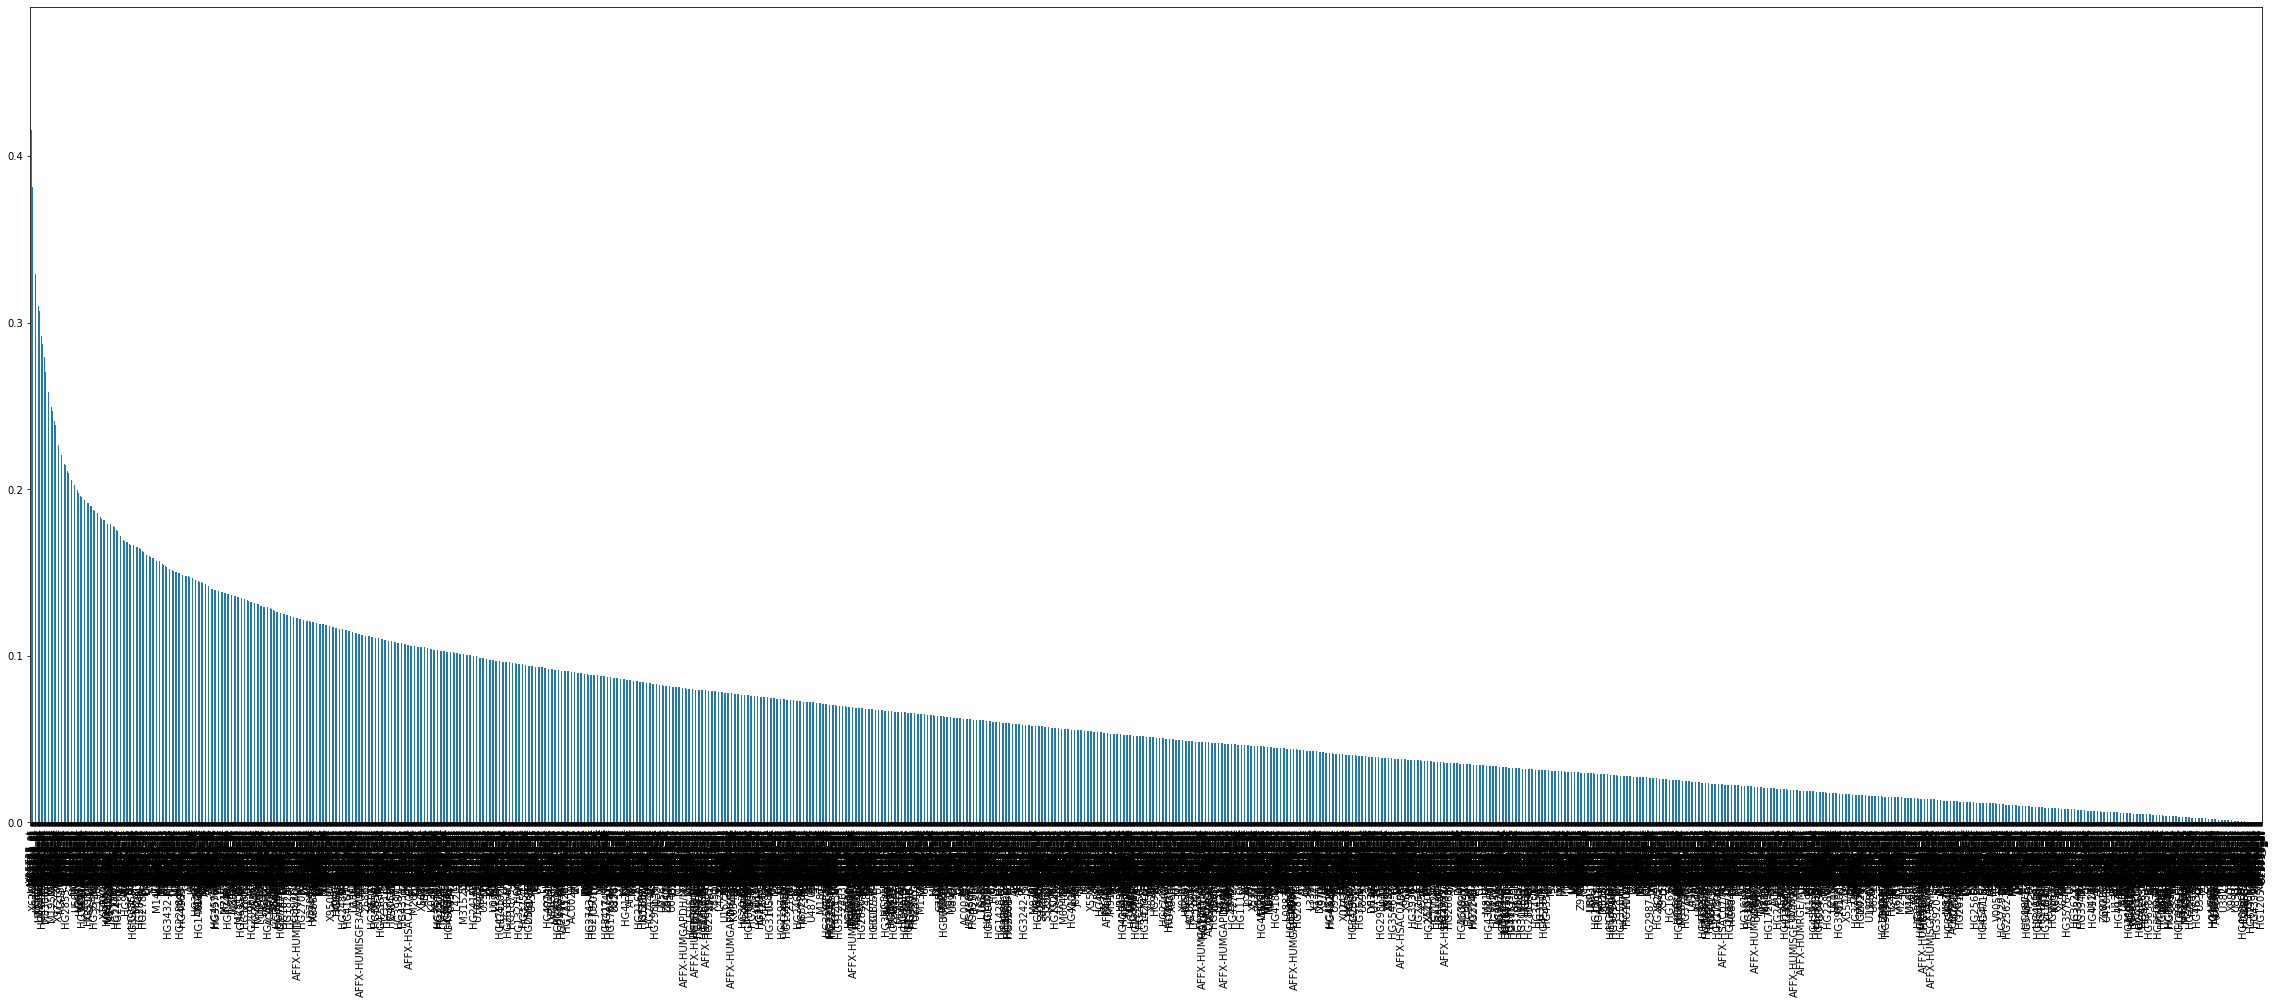

In [15]:
mutual_info=pd.Series(mutual_information)
mutual_info.index=feature_name
mutual_info.sort_values(ascending=False,inplace=True)
mutual_info.plot.bar(figsize=(40,15))

In [16]:
required_indices = (-mutual_information).argsort()[:number_of_features_required_1]
selected_features_mi=[]
selected_indices=[]
for i in range(number_of_features_required_1):
    required_indices[i] = required_indices[i] + 1
    selected_indices.append(required_indices[i])
    selected_features_mi.append(feature_name[required_indices[i]])
    print('Selected Feature '+str(i+1)+ ' is : ', feature_name[required_indices[i]])

Selected Feature 1 is :  M23254_at
Selected Feature 2 is :  X96381_rna1_at
Selected Feature 3 is :  M28209_at
Selected Feature 4 is :  M31932_at
Selected Feature 5 is :  L10333_s_at
Selected Feature 6 is :  M84605_at
Selected Feature 7 is :  X62691_at
Selected Feature 8 is :  X62534_s_at
Selected Feature 9 is :  M93107_at
Selected Feature 10 is :  X62466_at
Selected Feature 11 is :  M92303_at
Selected Feature 12 is :  D88532_at
Selected Feature 13 is :  U46569_at
Selected Feature 14 is :  M14660_at
Selected Feature 15 is :  Z49205_at
Selected Feature 16 is :  U05291_at
Selected Feature 17 is :  M11726_at
Selected Feature 18 is :  J05249_at
Selected Feature 19 is :  M96739_at
Selected Feature 20 is :  X59434_at
Selected Feature 21 is :  X55019_s_at
Selected Feature 22 is :  X77922_s_at
Selected Feature 23 is :  M19645_at
Selected Feature 24 is :  M63483_at
Selected Feature 25 is :  M31659_at
Selected Feature 26 is :  HG1614-HT1614_at
Selected Feature 27 is :  M13560_s_at
Selected Featur

Selected Feature 995 is :  X69433_at
Selected Feature 996 is :  X16832_at
Selected Feature 997 is :  U71088_at
Selected Feature 998 is :  D79206_s_at
Selected Feature 999 is :  L11931_at
Selected Feature 1000 is :  U03644_at
Selected Feature 1001 is :  HG3242-HT3419_s_at
Selected Feature 1002 is :  M31303_rna1_at
Selected Feature 1003 is :  X02152_at
Selected Feature 1004 is :  Z48923_at
Selected Feature 1005 is :  M36072_at
Selected Feature 1006 is :  U13045_at
Selected Feature 1007 is :  X98266_cds2_at
Selected Feature 1008 is :  U90910_at
Selected Feature 1009 is :  X95384_at
Selected Feature 1010 is :  X05908_at
Selected Feature 1011 is :  U60061_at
Selected Feature 1012 is :  X64838_at
Selected Feature 1013 is :  M16342_at
Selected Feature 1014 is :  M63896_at
Selected Feature 1015 is :  S56151_s_at
Selected Feature 1016 is :  U46570_at
Selected Feature 1017 is :  U12140_at
Selected Feature 1018 is :  U86136_at
Selected Feature 1019 is :  D59253_at
Selected Feature 1020 is :  X169

Selected Feature 1766 is :  S42457_at
Selected Feature 1767 is :  M55671_at
Selected Feature 1768 is :  Z22551_at
Selected Feature 1769 is :  D49493_at
Selected Feature 1770 is :  M27492_at
Selected Feature 1771 is :  HG2480-HT2576_at
Selected Feature 1772 is :  U38964_s_at
Selected Feature 1773 is :  L24774_s_at
Selected Feature 1774 is :  D11327_s_at
Selected Feature 1775 is :  U76992_at
Selected Feature 1776 is :  L43579_at
Selected Feature 1777 is :  U48296_at
Selected Feature 1778 is :  L11702_at
Selected Feature 1779 is :  HG33-HT33_at
Selected Feature 1780 is :  AB000905_at
Selected Feature 1781 is :  D28235_s_at
Selected Feature 1782 is :  U18271_cds1_at
Selected Feature 1783 is :  U12255_at
Selected Feature 1784 is :  M16652_at
Selected Feature 1785 is :  X90824_s_at
Selected Feature 1786 is :  M86873_s_at
Selected Feature 1787 is :  M60748_at
Selected Feature 1788 is :  M88163_at
Selected Feature 1789 is :  X74837_at
Selected Feature 1790 is :  X63563_at
Selected Feature 1791

Selected Feature 2875 is :  Y08319_at
Selected Feature 2876 is :  M21064_at
Selected Feature 2877 is :  L13278_at
Selected Feature 2878 is :  M96954_s_at
Selected Feature 2879 is :  L40379_at
Selected Feature 2880 is :  X65965_s_at
Selected Feature 2881 is :  U56417_at
Selected Feature 2882 is :  U26710_at
Selected Feature 2883 is :  U41745_at
Selected Feature 2884 is :  J02621_s_at
Selected Feature 2885 is :  S78234_at
Selected Feature 2886 is :  M25280_at
Selected Feature 2887 is :  Y10807_s_at
Selected Feature 2888 is :  M16707_rna1_at
Selected Feature 2889 is :  L25286_s_at
Selected Feature 2890 is :  S71043_rna1_s_at
Selected Feature 2891 is :  D87464_at
Selected Feature 2892 is :  X06272_at
Selected Feature 2893 is :  D87460_at
Selected Feature 2894 is :  U72761_at
Selected Feature 2895 is :  AF010193_at
Selected Feature 2896 is :  M29273_at
Selected Feature 2897 is :  X76105_at
Selected Feature 2898 is :  S78085_at
Selected Feature 2899 is :  S52028_s_at
Selected Feature 2900 is

In [17]:
required_features_mi = selected_features_mi
print('Length of required features : '+str(len(required_features_mi)))
print(required_features_mi)

Length of required features : 3431
['M23254_at', 'X96381_rna1_at', 'M28209_at', 'M31932_at', 'L10333_s_at', 'M84605_at', 'X62691_at', 'X62534_s_at', 'M93107_at', 'X62466_at', 'M92303_at', 'D88532_at', 'U46569_at', 'M14660_at', 'Z49205_at', 'U05291_at', 'M11726_at', 'J05249_at', 'M96739_at', 'X59434_at', 'X55019_s_at', 'X77922_s_at', 'M19645_at', 'M63483_at', 'M31659_at', 'HG1614-HT1614_at', 'M13560_s_at', 'U43189_s_at', 'U04209_at', 'Y07683_at', 'X12451_at', 'M63167_at', 'M31241_s_at', 'M29877_at', 'L48513_at', 'M83712_s_at', 'X51630_at', 'M22976_at', 'Z18956_at', 'X52142_at', 'M64082_at', 'S78693_f_at', 'S82592_at', 'D88378_at', 'M33764_at', 'X76717_at', 'X17094_at', 'M24069_at', 'M19878_at', 'M34996_s_at', 'L41887_rna1_at', 'S53911_at', 'U59913_at', 'M90299_at', 'X07767_at', 'M16279_at', 'M11353_at', 'D63881_at', 'J03241_s_at', 'M15517_cds3_s_at', 'Y00764_at', 'M95623_cds1_at', 'U90550_at', 'U30521_at', 'X82206_s_at', 'X17093_at', 'M13934_cds2_at', 'X80497_at', 'M33308_at', 'L22005_a

In [18]:
X_train1 = X_train[required_features_mi]
X_train1.head()

,M23254_at,X96381_rna1_at,M28209_at,M31932_at,L10333_s_at,M84605_at,X62691_at,X62534_s_at,M93107_at,X62466_at,...,U39412_at,U91930_at,U34605_at,U94319_at,U07804_s_at,X83492_s_at,U29607_at,X96719_at,Z46376_rna1_at,HG3730-HT4000_s_at
55,-0.525528,0.697176,-1.543434,-1.058378,-0.020085,-2.107475,-0.694489,-0.377317,1.189291,-0.876764,...,-0.335597,0.122720,-1.245122,-0.662507,-0.047294,-0.010044,-1.201033,-0.701822,-0.391146,0.307189
70,0.742339,-1.289414,0.266819,-0.976641,0.442276,0.878082,-2.092041,-0.827821,-0.555695,0.159007,...,-0.907180,-0.164900,1.209740,-0.349532,-1.344506,0.877483,5.440728,-0.729439,1.315672,-0.245893
62,1.168289,0.966327,-0.691550,-0.393721,-0.059435,0.380490,-1.573162,0.264521,0.362962,-1.156532,...,-0.939112,0.524543,0.734979,-0.252048,-0.598609,-0.021001,-0.958463,-0.607135,0.789403,0.617941
43,0.150002,-0.270486,-0.517301,0.774268,1.632609,1.099235,-0.625352,-0.893048,1.854048,1.722879,...,-0.664496,0.592219,-0.145066,-0.849779,-1.020203,-0.262058,1.625145,-0.524284,-1.201884,1.265104
4,-0.202738,-1.238148,0.658879,-0.423835,-0.630007,0.325202,0.730224,0.287134,0.699957,-0.791890,...,-0.322824,0.516084,0.989729,0.232807,0.709413,-0.327801,-0.635309,-0.502585,0.291581,1.407651


# Selection of features using F Classification 

In [19]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # Here, we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # It is storing the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features_fc = correlation(X_train1, 0.5)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :76.8391182422638 seconds


In [20]:
print('Length of selected features : '+str(len(selected_features_fc)))

Length of selected features : 3069


In [21]:
selected_features_fc = list(selected_features_fc)
print('Selected features using F classification')
print(selected_features_fc)

Selected features using F classification
['L34587_at', 'U97188_at', 'X60003_s_at', 'U70867_at', 'X73113_at', 'U19878_at', 'D14664_at', 'Y08136_at', 'L19493_s_at', 'S67970_at', 'X65633_at', 'U60519_at', 'M64590_at', 'M13150_s_at', 'K01396_at', 'M27783_s_at', 'X82554_rna1_at', 'HG3125-HT3301_s_at', 'X95808_s_at', 'X82634_at', 'D00654_at', 'U96131_at', 'Z14978_at', 'U53468_at', 'Z25884_at', 'U58522_at', 'U28014_at', 'D31885_at', 'X53296_s_at', 'U33147_at', 'U76638_at', 'M83181_at', 'U29680_at', 'U07158_at', 'D43948_at', 'X14975_at', 'U48705_rna1_s_at', 'U09937_rna1_s_at', 'M98045_at', 'M64108_at', 'U15085_at', 'M36067_at', 'M93119_at', 'M69066_at', 'X99325_at', 'L05148_at', 'X14850_at', 'D26155_s_at', 'M65214_s_at', 'X89985_at', 'K01911_at', 'X67951_at', 'U43177_at', 'M17254_s_at', 'S78873_s_at', 'X92814_at', 'X55005_rna1_at', 'Z17240_at', 'HG4517-HT4920_s_at', 'X77584_at', 'X59932_s_at', 'M31642_at', 'D87075_at', 'M15841_at', 'M33684_s_at', 'J04111_at', 'U57341_at', 'X65977_at', 'L38608_

In [22]:
required_features_fc = selected_features_fc[:number_of_features_required_2]
print('Length of required features : '+str(len(required_features_fc)))

Length of required features : 1715


In [23]:
X_train2 = X_train[required_features_fc]
X_train2.head()

,L34587_at,U97188_at,X60003_s_at,U70867_at,X73113_at,U19878_at,D14664_at,Y08136_at,L19493_s_at,S67970_at,...,M55593_at,M76482_at,D13643_at,L07261_s_at,Z26876_at,AFFX-HUMGAPDH/M33197_3_st,X79865_at,M98776_rna1_at,X82206_s_at,D21261_at
55,-1.068814,-0.264106,-0.646830,-0.196973,-0.031892,-0.636439,-0.167596,1.203001,-0.662716,-0.351645,...,-0.613302,0.053416,0.477100,-0.682215,-0.609684,-0.620304,-0.726167,-0.846213,-1.252362,-0.633514
70,-0.817253,0.812929,0.048493,2.469267,2.552368,-0.636439,-0.101050,0.873214,0.117893,0.844341,...,2.278694,1.229963,-3.222748,-1.312741,0.067976,0.363572,1.727416,0.510370,-0.683864,1.185645
62,-0.312194,-1.724087,0.609719,0.323806,0.001508,2.625722,2.838037,-0.917055,-1.430206,-1.892236,...,-0.619474,-0.275512,-0.248517,-0.397710,-0.123799,-1.290732,-0.552430,0.592679,-0.506998,-0.441886
43,-1.388104,0.836863,-0.179970,-1.025818,0.239477,1.608039,-1.520685,-0.775718,1.036257,-1.527359,...,0.544114,0.913687,-0.827947,-0.097825,-1.801432,-0.089185,-0.520519,2.141317,-1.094446,0.933315
4,0.757910,3.002900,-0.165070,-0.989143,-0.478605,-0.036982,-0.078869,-0.092589,-0.734874,0.986238,...,-1.029971,-0.351418,0.171437,1.278566,0.104639,-0.846682,2.248624,-0.669400,0.099399,0.614807


# Feature Selection Using T-Test

In [24]:
import statistics

In [25]:
temp_index = ['gene'] + required_features_fc
new_df = df[temp_index]
new_df.shape

(72, 1716)

In [26]:
start_time_t = time.time()
x= new_df.values        # It is converting df into numpy arrray

a,b = x.shape           # Here, a is taking row and b is taking columns 
n1 =0;
n2 = 0;

for i in range(a):      
    if x[i][0] == 1:
        n1=n1 + 1;
    else:
        n2=n2 + 1;


sample1 = []
sample2= []
tval=[]

# It is calculating t-test

for j in range(1,b):      
    for i in range(a):

        if x[i][0]== 1:           
            sample1.append(x[i][j])
        else:
            sample2.append(x[i][j])


# It is converting sample values from string to integer
    sample1 = list(map(int,sample1))       
    sample2 = list(map(int,sample2))


    s1bar = statistics.mean(sample1)          
    s2bar = statistics.mean(sample2)

    s1var = statistics.variance(sample1)     
    s2var = statistics.variance(sample2)



    t = abs(s1bar - s2bar)/np.sqrt(s1var/n1+s2var/n2)        # It is calculating t value by comparing mean and variance using given formula

    tval.append(t)       

    sample1.clear()     
    sample2.clear()



sort_index=[]

sort_index = sorted(range(len(tval)), key=lambda k: tval[k])   

new_index = [p+1 for p in sort_index]    #It is increasing sorted index by 1 because we have to fetch it from dataframe for corresponding columns

new_index.reverse()    

required_features_t = new_index[:number_of_features_required_3]  #It is selecting important features
print('Time taken by T Test is :'+str(time.time() - start_time_t)+' seconds')

Time taken by T Test is :1.576784372329712 seconds


In [27]:
print(required_features_t)

[1549, 392, 729, 1475, 927, 1290, 553, 1672, 346, 1321, 49, 1163, 1134, 713, 1670, 145, 1612, 1304, 1002, 1366, 1064, 1324, 697, 839, 52, 1104, 660, 590, 1470, 1150, 917, 659, 734, 446, 469, 854, 1622, 47, 1116, 419, 982, 413, 7, 102, 46, 1610, 39, 281, 461, 825, 1186, 1538, 24, 744, 1082, 693, 31, 883, 528, 1585, 100, 450, 521, 523, 157, 1146, 242, 113, 1396, 864, 575, 1247, 604, 769, 1132, 117, 51, 979, 1369, 1535, 1293, 1326, 515, 1265, 449, 393, 736, 983, 981, 1427, 473, 69, 1630, 292, 193, 1420, 751, 148, 1655, 1060, 536, 1642, 1038, 594, 1162, 263, 171, 1027, 1545, 721, 186, 1715, 1575, 4, 358, 985, 918, 564, 1013, 1072, 591, 1232, 2, 801, 607, 1080, 1494, 1240, 1216, 760, 1507, 728, 1335, 534, 789, 1117, 1244, 1036, 1278, 1229, 1689, 732, 1656, 209, 15, 856, 295, 547, 753, 1513, 95, 183, 876, 819, 481, 103, 1697, 932, 467, 777, 1332, 742, 1521, 1007, 326, 592, 1498, 410, 1165, 381, 738, 1143, 1383, 1634, 1171, 1223, 743, 669, 136, 426, 756, 1578, 665, 568, 115, 396, 1379, 1526, 

In [28]:
df1 = df.iloc[:,required_features_t]
selected_features_tt=list(df1)
print('Length of selected_features_tt : ',len(selected_features_tt))

Length of selected_features_tt :  977


In [29]:
print('selected_features_tt :',selected_features_tt)

selected_features_tt : ['M62762_at', 'D63475_at', 'HG4074-HT4344_at', 'M37763_at', 'L10123_at', 'M19283_at', 'D87127_at', 'M84332_at', 'D49950_at', 'M22382_at', 'AB003177_at', 'L40636_at', 'L38941_at', 'HG37-HT37_at', 'M83822_at', 'D13900_at', 'M73547_at', 'M20902_at', 'L19711_at', 'M26679_at', 'L29008_at', 'M22538_at', 'HG3432-HT3621_at', 'J04794_at', 'AB006190_at', 'L36529_at', 'HG2480-HT2576_at', 'D87684_at', 'M37245_at', 'L40387_at', 'L08246_at', 'HG2463-HT2559_at', 'HG4157-HT4427_at', 'D79993_at', 'D83004_at', 'J05500_at', 'M74525_at', 'AB003102_at', 'L37347_at', 'D64158_at', 'L16862_at', 'D63881_at', 'AFFX-HUMISGF3A/M97935_3_at', 'D00726_at', 'AB002559_at', 'M73047_at', 'AB000905_at', 'D32001_at', 'D80010_at', 'J04164_at', 'L42542_at', 'M60922_at', 'AFFX-HUMGAPDH/M33197_3_st', 'HG4319-HT4589_at', 'L33842_rna1_at', 'HG3355-HT3532_at', 'AB000449_at', 'L03785_at', 'D86971_at', 'M64716_at', 'D00654_at', 'D79997_at', 'D86964_at', 'D86966_at', 'D14662_at', 'L40357_at', 'D28588_at', 'D1

In [30]:
X_train3 = X_train.iloc[:,required_features_t]

In [31]:
X_train3.head()

,M62783_at,D63476_at,HG4102-HT4372_at,M37766_at,L10284_at,M19301_at,D87258_at,M84349_at,D49958_at,M22489_at,...,D89016_at,M14338_at,D87024_at,M25753_at,M14123_xpt4_at,D29641_at,D86970_at,D30655_at,M83181_at,L20861_at
55,-0.424863,-0.587720,-0.513139,-0.461619,-0.822306,-1.450608,0.176878,-0.757977,4.358010,-0.098523,...,0.098594,-0.246287,-0.186270,1.166334,0.164672,-0.481944,-0.139355,-0.770035,-1.055404,-0.643234
70,0.550872,1.241959,0.957751,-0.701634,-0.891615,0.924573,1.516069,-2.121183,1.133968,-0.314441,...,0.151649,1.298880,0.992888,-0.976853,-0.429949,-0.048725,0.425080,0.608172,1.370124,2.734325
62,0.850440,-0.426489,1.606333,-0.657074,0.929838,-0.551891,1.683468,-0.563234,0.917831,-0.467024,...,0.424883,0.121610,1.031549,1.961387,-0.213723,0.766745,-0.481658,-0.683621,-0.290015,-1.240910
43,0.546592,0.021214,0.424988,0.161206,0.221033,2.080067,-0.042029,-0.378740,1.818401,-0.443992,...,4.305864,-0.749079,0.996754,-0.124187,-0.997542,-0.779251,0.694552,-0.780346,1.494096,1.691869
4,-0.163811,-0.037808,1.861133,-0.089949,0.716365,0.881777,-0.157920,-0.701604,-0.144842,-0.072613,...,-0.264833,0.268769,1.070210,1.777027,-0.168676,1.216953,0.066997,0.953337,-0.478668,-0.698832


In [32]:
X_test3 = X_test.iloc[:,required_features_t]
X_test3.head()

,M62783_at,D63476_at,HG4102-HT4372_at,M37766_at,L10284_at,M19301_at,D87258_at,M84349_at,D49958_at,M22489_at,...,D89016_at,M14338_at,D87024_at,M25753_at,M14123_xpt4_at,D29641_at,D86970_at,D30655_at,M83181_at,L20861_at
26,2.258408,0.032730,0.343915,0.775928,-0.105184,-1.365016,-1.239575,-0.809226,0.665672,-0.023671,...,0.727297,-0.074601,0.660404,-0.089620,-1.330891,0.163637,0.218727,-1.295393,0.572395,0.844004
27,0.366852,-0.508544,0.482897,-0.648972,0.125848,-0.573289,0.666198,-1.229462,0.107318,-0.622485,...,-0.124237,-0.184970,0.184874,-1.264915,0.101606,-0.354527,0.092488,0.379371,0.200480,-0.128956
48,-1.511866,-0.587720,-0.987993,-0.801894,-1.026538,-1.514802,-1.638757,0.446359,-1.369617,0.770909,...,-1.294102,0.894194,-0.329316,-1.253393,-0.249761,0.078692,1.113327,0.172174,-0.758951,-0.698832
22,-1.208019,-0.564687,-1.057484,-0.441364,-0.752072,-0.723075,-1.741772,-0.091749,-0.162853,-0.144585,...,-1.654877,-0.209497,-0.646335,0.083218,0.921463,-1.373865,-0.678300,-0.660544,-1.869304,0.649412
30,-0.476218,-0.178885,0.841933,-0.694545,0.303280,-1.193832,1.297163,1.650695,0.215386,-0.256863,...,1.220710,-0.749079,-1.021346,0.659344,-1.817399,-0.439472,-0.958697,-0.662017,-0.893703,1.608472


In [33]:
X_test3.shape

(15, 977)

In [34]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train3)

y_test3 = np.array([a+1 for a in y_test])

print(y_test3)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [35]:
temp_fscore=0
temp_cm = np.zeros([2,2])
sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 86.6667
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 87.7193
Testing accuracy on selected features for 2 neighbors: 80.0000
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 91.2281
Testing accuracy on selected features for 3 neighbors: 93.3333
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 85.9649
Testing accuracy on selected features for 4 neighbors: 86.6667
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 89.4737
Testing accuracy on selected features for 5 neighbors: 93.3333
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 85.9649
Testing accuracy on selected features for 6 neighbors: 80.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [36]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [1 7]]
Average Confusion matrix is : [[7.         0.        ]
 [3.78947368 4.21052632]]


Confusion Matrix of KNN Classifier:


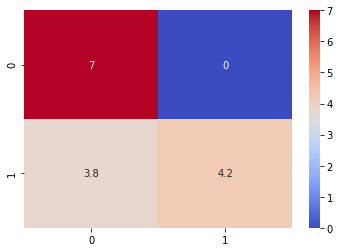

In [37]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [38]:
f_score_knn = f1_score(y_test3, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9333333333333333
Average F-Score is : 0.795579635362917


# SVM(Support Vector Machine)

In [39]:
from sklearn.svm import SVC
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 98.2456
Testing accuracy on selected features: 80.0000


In [40]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print('Confusion Matrix of SVM Classifier:')
print(cm_svc)

Confusion Matrix of SVM Classifier:
[[7 0]
 [3 5]]


Confusion Matrix of SVM Classifier:


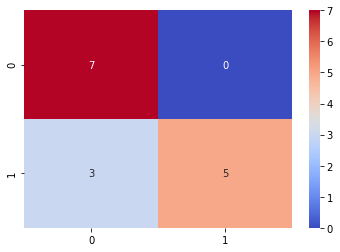

In [41]:
print('Confusion Matrix of SVM Classifier:')
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [42]:
f_score_svc = f1_score(y_test3, y_test_prediction_svc)

print(' F-Score of SVM Classifier is : '+str(f_score_svc))

 F-Score of SVM Classifier is : 0.8235294117647058
